## Twitter Bot Detection EDA

**Summer 2018**<br>
**Contributers:** Vivek Mishra and Karan Bhandarkar


In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import json
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
from bs4 import BeautifulSoup
import re
#import unidecode
from pandas.plotting import scatter_matrix
from wordcloud import WordCloud, STOPWORDS

<HR>
Read the datasets created into DataFrames

In [2]:
account_full_DF = pd.read_json("data/account_details.json", lines=True)
tweets_full_DF = pd.read_json("data/tweets.json", lines=True)

In [3]:
tweets_full_DF.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,isBot,is_quote_status,lang,name,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2018-08-10 21:14:26,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Turkish currency's freefall rocks world equity...,NaN,1028026811098308608,1028026811098308608,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
1,NaN,NaN,2018-08-10 21:13:30,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1,False,South Korean Police Raid Crypto Firm Which Cla...,NaN,1028026576125009921,1028026576125009920,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
2,NaN,NaN,2018-08-10 20:14:28,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Turkish currency's freefall rocks equity marke...,NaN,1028011719870873602,1028011719870873600,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
3,NaN,NaN,2018-08-10 20:13:30,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,How Crypto Projects Move Forward From Here htt...,NaN,1028011478799003654,1028011478799003648,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
4,NaN,NaN,2018-08-10 19:58:04,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Mines raises $13m https://t.co/PIRDDNHQJ4 by @...,NaN,1028007593908813824,1028007593908813824,NaN,NaN,NaN,NaN,NaN,1,False,et,FintechBot,None,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."


In [4]:
account_full_DF.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,has_extended_profile,id,id_str,isBot,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_location,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,2009-02-19 10:03:21,False,False,A little twitter bot for all the latest financ...,{'url': {'urls': [{'url': 'http://t.co/shU9Ofw...,259,NaN,9183,NaN,995,False,False,21287212,21287212,1,False,False,en,1028,"Sheffield, England",FintechBot,NaN,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,True,NaN,http://pbs.twimg.com/profile_images/9048513349...,https://pbs.twimg.com/profile_images/904851334...,19CF86,"{'id': '07e9c7d1954fff64', 'url': 'https://api...",181A1E,252429,666666,True,False,FintechBot,{'created_at': 'Fri Aug 10 21:14:26 +0000 2018...,114731,NaN,none,http://t.co/shU9OfwfD8,NaN,False
1,False,2017-02-08 04:35:48,True,False,"2018 Federal/CA candidacy/committee filings, c...",{'url': {'urls': [{'url': 'https://t.co/XHsD8f...,12,NaN,1463,NaN,1,False,False,829186945267834880,829186945267834880,1,False,False,en,46,"The Cloud, CA",CATargetBot,NaN,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/82918694...,http://pbs.twimg.com/profile_images/9233073966...,https://pbs.twimg.com/profile_images/923307396...,1DA1F2,None,C0DEED,DDEEF6,333333,True,False,CATargetBot,{'created_at': 'Fri Aug 10 21:20:14 +0000 2018...,19639,NaN,none,https://t.co/XHsD8f9rGH,NaN,False
2,False,2018-01-08 16:38:35,True,False,UK Investment Information from a variety of fe...,{'description': {'urls': []}},0,NaN,7,NaN,14,False,False,950406387632402433,950406387632402432,1,False,False,en,0,United Kingdom,Finance Feed,NaN,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/95040638...,http://pbs.twimg.com/profile_images/9518350970...,https://pbs.twimg.com/profile_images/951835097...,1DA1F2,"{'id': '6416b8512febefc9', 'url': 'https://api...",C0DEED,DDEEF6,333333,True,False,InvestorNewsBot,{'created_at': 'Tue Aug 07 00:07:49 +0000 2018...,7520,NaN,none,None,NaN,False
3,False,2011-11-08 10:54:31,True,False,#ForexTrading #ForexRobots,{'url': {'urls': [{'url': 'https://t.co/EQbbvN...,6,NaN,30999,NaN,33985,True,False,407659112,407659112,1,False,False,en,494,Riga,Forex Trading Bots,NaN,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/40765911...,http://pbs.twimg.com/profile_images/9670717406...,https://pbs.twimg.com/profile_images/967071740...,1DA1F2,None,C0DEED,DDEEF6,333333,True,False,FxTradingBot,{'created_at': 'Fri Aug 10 21:00:02 +0000 2018...,109836,NaN,none,https://t.co/EQbbvN1nWT,NaN,False
4,False,2017-09-08 05:07:29,True,False,Tweeting out the companies Alaskans own in the...,{'url': {'urls': [{'url': 'https://t.co/cum0F6...,1,NaN,183,NaN,0,False,False,906021147015135232,906021147015135232,1,False,False,en,1,"Anchorage, AK",PFD Bot,NaN,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/90602114...,http://pbs.twimg.com/profile_images/9117990221...,https://pbs.twimg.com/profile_images/911799022...,1DA1F2,"{'id': '7a863bb88e5bb33c', 'url': 'https://api...",C0DEED,DDEEF6,333333,True,False,pfdbot,{'created_at': 'Fri Aug 10 21:21:19 +0000 2018...,26772,NaN,none,https://t.co/cum0F6SCOd,NaN,False


<HR>
Discard cells that don't need to be included for analysis.

In [5]:
accountDF = account_full_DF[['id','isBot','name','id_str','screen_name','location','description','url','following','followers_count','friends_count','listed_count','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile']]
tweetsDF = tweets_full_DF[['name','isBot','full_text','lang','created_at','retweeted','entities','coordinates','retweet_count','favorite_count','place','geo','is_quote_status']]

In [6]:
print("Number of Tweets that we have is {} and number of accounts that we have is {}".format(len(tweetsDF), len(accountDF)))

Number of Tweets that we have is 10614 and number of accounts that we have is 100


<HR>
The user account dataset is not large enough. We bootstrap by picking random samples from what we have, to increase the size of the dataset.<BR>First we segregate the dataset into bots and non-bots so that we can have equal representation in our final dataset. Then we combine the two bootstrapped sets, shuffle them up and re-index.<BR><BR>
This is not a problem for tweets, but we do need to shuffle since user tweets are grouped together, so we just shuffle and reindex that dataframe. 

In [7]:
bot_accountDF = accountDF.loc[accountDF['isBot']==1].sample(frac=40, replace=True)
nonbot_accountDF = accountDF.loc[accountDF['isBot']==0].sample(frac=40, replace=True)
accountDF = pd.concat([bot_accountDF, nonbot_accountDF]).sample(frac=1).reset_index(drop=True)

tweetsDF = tweetsDF.sample(frac=1).reset_index(drop=True)

** Let's reexamine the data frame ** 

In [8]:
tweetsDF.head()

,name,isBot,full_text,lang,created_at,retweeted,entities,coordinates,retweet_count,favorite_count,place,geo,is_quote_status
0,ALTLENE_bot,1,つゆだくなのです！,ja,2018-07-05 13:34:20,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,None,NaN,False
1,sentimentrader,0,"It has, but not since 1977. https://t.co/gKSZt...",en,2017-12-20 14:00:00,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,11,24,None,NaN,True
2,reverseocr,1,hiatus https://t.co/vShJ2CY3LW,in,2017-09-11 18:15:31,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,None,NaN,False
3,CATargetBot,1,NEW F497\nNewsom for California Governor 2018\...,en,2018-08-09 00:50:05,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,None,NaN,False
4,AFacts4You,1,These moving blocks can mimic human movements....,en,2018-01-13 19:02:23,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,None,NaN,False


In [9]:
accountDF.head()

,id,isBot,name,id_str,screen_name,location,description,url,following,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile
0,1249693405,1,Dear Assistant,1249693405,DearAssistant,Twitter Bot,I am a Twitter bot and I'll try to answer your...,http://t.co/8P3zxTfCWF,NaN,4700,1,146,2013-03-07 17:56:44,11,False,5317,en,{'created_at': 'Mon Jun 20 02:56:26 +0000 2016...,False,False,False
1,4128946034,1,SanJacintoClan,4128946034,SanJacintoClan,Galveston Island in the Great State of Texas,"8th Gen. Austin’s Colony, 7th Gen. Lateral of ...",https://t.co/DbSKVTTHlK,NaN,2486,4944,19,2015-11-04 23:30:43,8757,False,14895,en,{'created_at': 'Fri Aug 10 20:02:18 +0000 2018...,False,False,True
2,22088714,0,Cullen Roche,22088714,cullenroche,"Encinitas, CA",Former mail delivery boy turned multi-asset in...,https://t.co/2QrUqP2CBW,NaN,34263,1589,1591,2009-02-27 01:00:36,6410,False,14364,en,{'created_at': 'Fri Aug 10 21:22:47 +0000 2018...,False,False,True
3,2992395456,0,Mark Constantine (69th SFOD-D space force JSOC),2992395456,vexmark,,not an alcoholic,None,NaN,19056,353,642,2015-01-22 16:55:48,12353,False,36128,en,{'created_at': 'Fri Aug 10 20:27:47 +0000 2018...,False,False,False
4,1469603575,0,Quoth the Raven,1469603575,QTRResearch,"Philadelphia, PA","My opinions, not financial advice, not license...",https://t.co/aA1IE0ryMr,NaN,35119,998,871,2013-05-30 12:04:26,53408,False,54219,en,{'created_at': 'Fri Aug 10 21:23:20 +0000 2018...,False,False,False


<HR>
### Following to Follower Ratio:

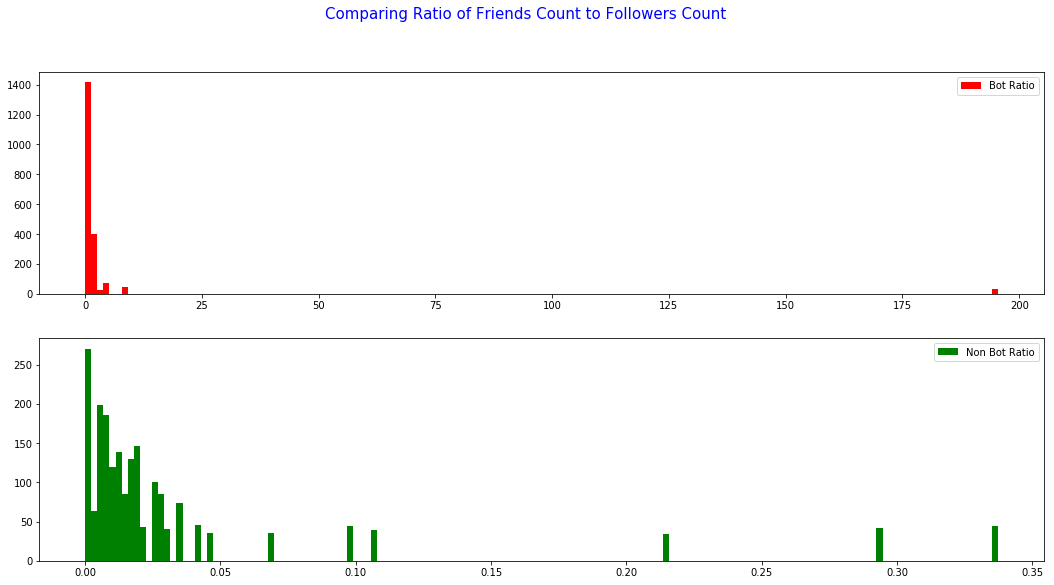

In [10]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing Ratio of Friends Count to Followers Count", fontsize=15, color="b")

bot_data = accountDF[accountDF['isBot']==1]['friends_count'] / accountDF[accountDF['isBot']==1]['followers_count']
non_bot_data = accountDF[accountDF['isBot']==0]['friends_count'] / accountDF[accountDF['isBot']==0]['followers_count']

ax[0].hist(bot_data, bins=150, label='Bot Ratio', color="r")
ax[1].hist(non_bot_data, bins=150, label='Non Bot Ratio', color="g")

ax[0].legend()
ax[1].legend()

<HR>
### Listed Count:

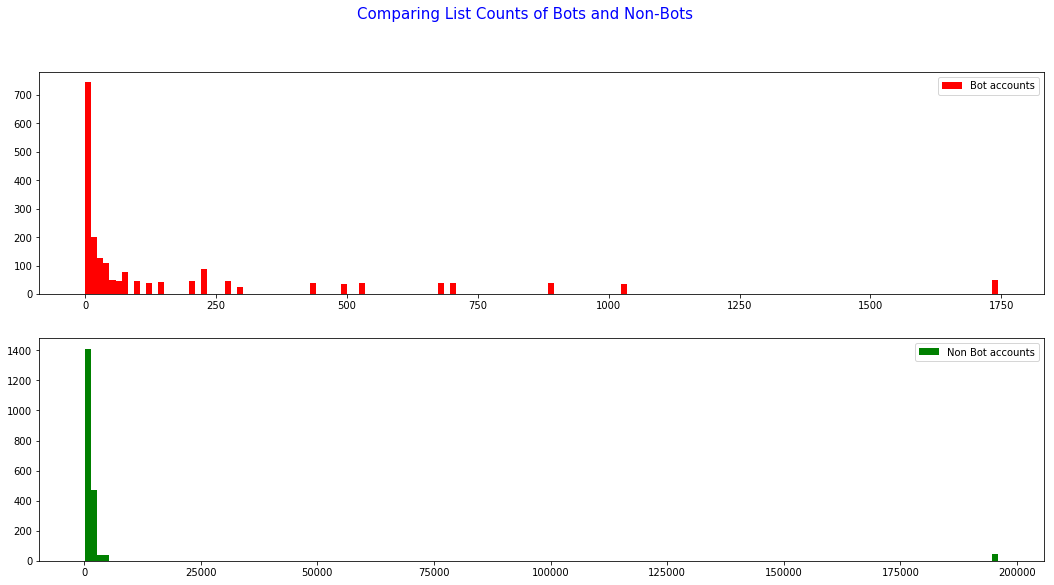

In [11]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing List Counts of Bots and Non-Bots", fontsize=15, color="b")
ax[0].hist(bot_accountDF.listed_count, bins=150, color="r", label="Bot accounts")
ax[1].hist(nonbot_accountDF.listed_count, bins=150, color='g', label="Non Bot accounts")

ax[0].legend()
ax[1].legend()

#### There is one clear outlier in each so discarding that one

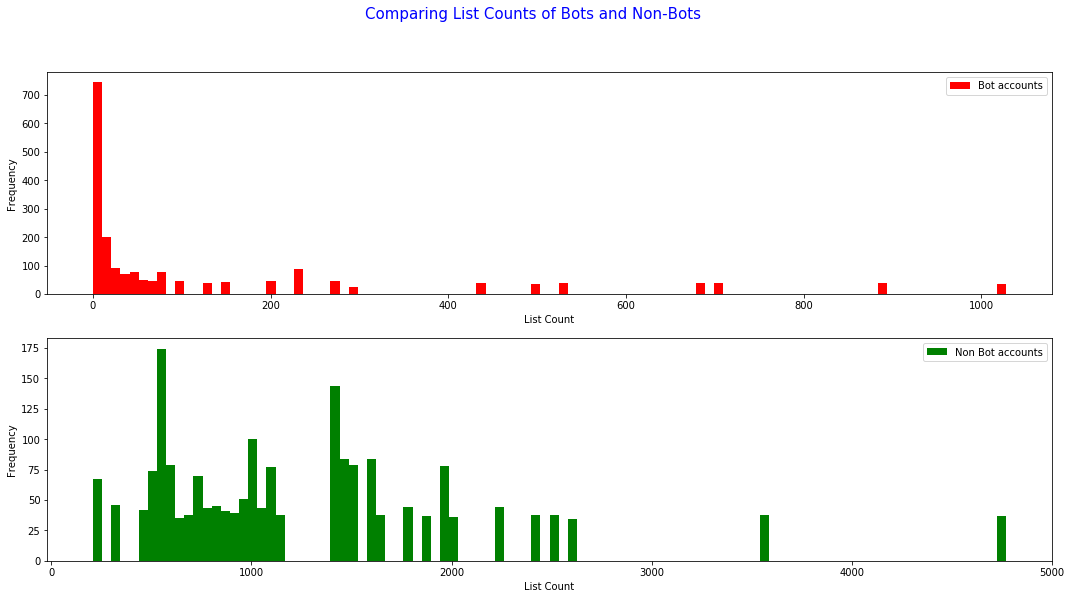

In [12]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing List Counts of Bots and Non-Bots", fontsize=15, color="b")
ax[0].hist(bot_accountDF.listed_count[bot_accountDF.listed_count<1500], bins=100, color="r", label="Bot accounts")
ax[0].set_xlabel("List Count")
ax[0].set_ylabel("Frequency")

ax[1].hist(nonbot_accountDF.listed_count[nonbot_accountDF.listed_count<175000], bins=100, color='g', label="Non Bot accounts")
ax[1].set_xlabel("List Count")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

### Verified Status

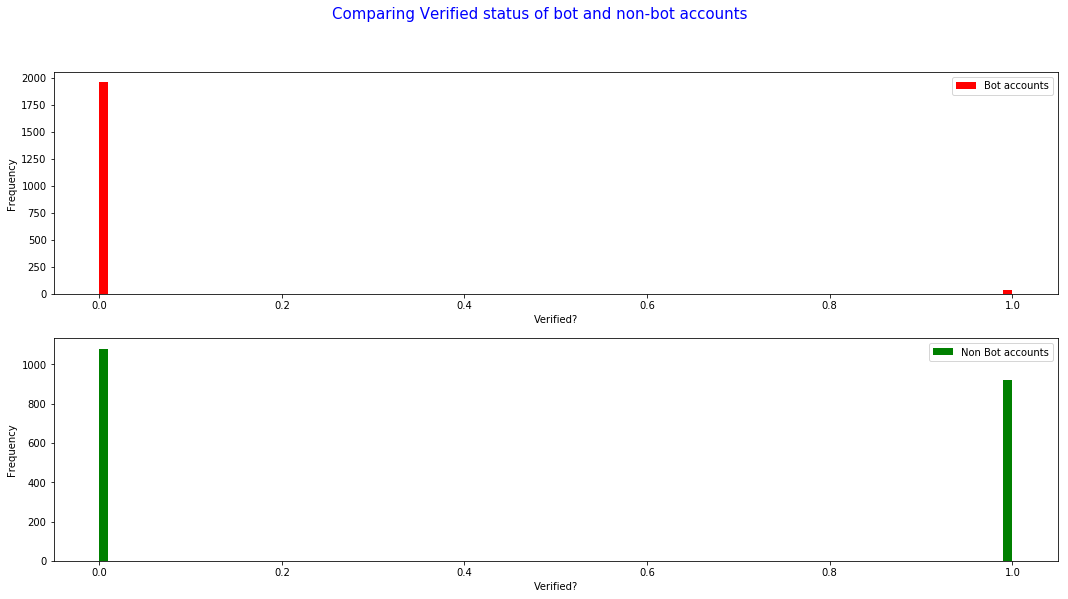

In [13]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing Verified status of bot and non-bot accounts", fontsize=15, color="b")
ax[0].hist(bot_accountDF.verified, bins=100, color="r", label="Bot accounts")
ax[0].set_xlabel("Verified?")
ax[0].set_ylabel("Frequency")

ax[1].hist(nonbot_accountDF.verified, bins=100, color='g', label="Non Bot accounts")
ax[1].set_xlabel("Verified?")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

In [14]:
np.unique(bot_accountDF[bot_accountDF.verified==1].name)

array(['DFRLab'], dtype=object)

#### The only case of verified bots is DFRLabs. This is fine since it is indeed a reliable source of information. It does not qualify as a bot for all our intents and purposes, and hence, will be discarded from the dataset. 

In [15]:
accountDF = accountDF[accountDF.name != 'DFRLab']
accountDF[accountDF.name == 'DFRLab']

,id,isBot,name,id_str,screen_name,location,description,url,following,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile


In [16]:
tweetsDF = tweetsDF[tweetsDF.name != 'DFRLab']
tweetsDF[tweetsDF.name == 'DFRLab']

,name,isBot,full_text,lang,created_at,retweeted,entities,coordinates,retweet_count,favorite_count,place,geo,is_quote_status


<HR>
### Tweets Per Day:

In [17]:
from datetime import datetime, date, time

bots_days = (datetime.now() - bot_accountDF.created_at).astype('timedelta64[D]')
non_bots_days = (datetime.now() - nonbot_accountDF.created_at).astype('timedelta64[D]')

bots_data = bot_accountDF['statuses_count']/bots_days
non_bots_data = nonbot_accountDF['statuses_count']/non_bots_days

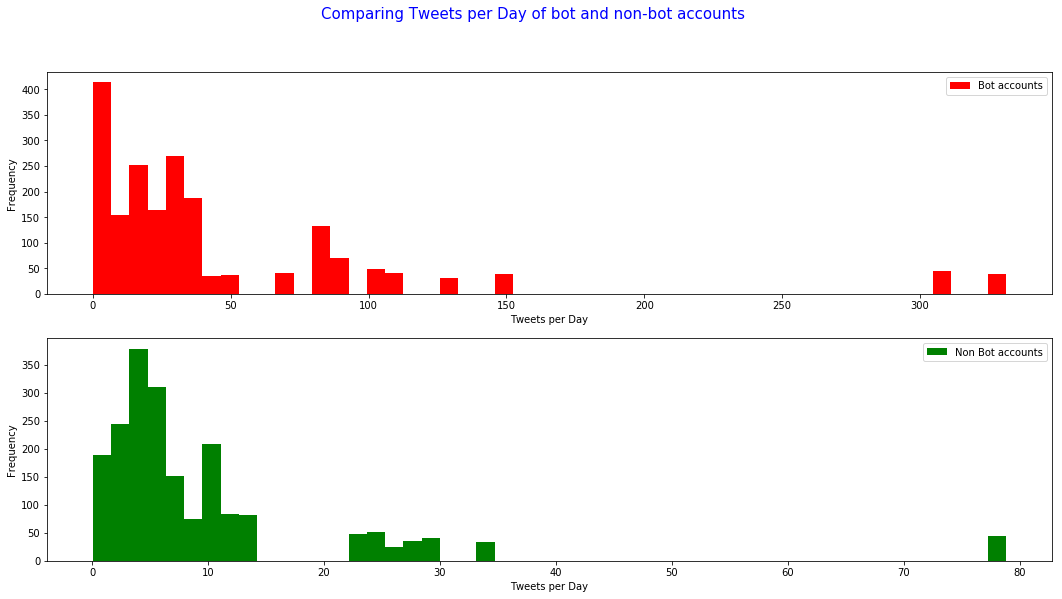

In [18]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing Tweets per Day of bot and non-bot accounts", fontsize=15, color="b")
ax[0].hist(bots_data, bins=50, color="r", label="Bot accounts")
ax[0].set_xlabel("Tweets per Day")
ax[0].set_ylabel("Frequency")

ax[1].hist(non_bots_data, bins=50, color='g', label="Non Bot accounts")
ax[1].set_xlabel("Tweets per Day")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

### Extended Profile: 

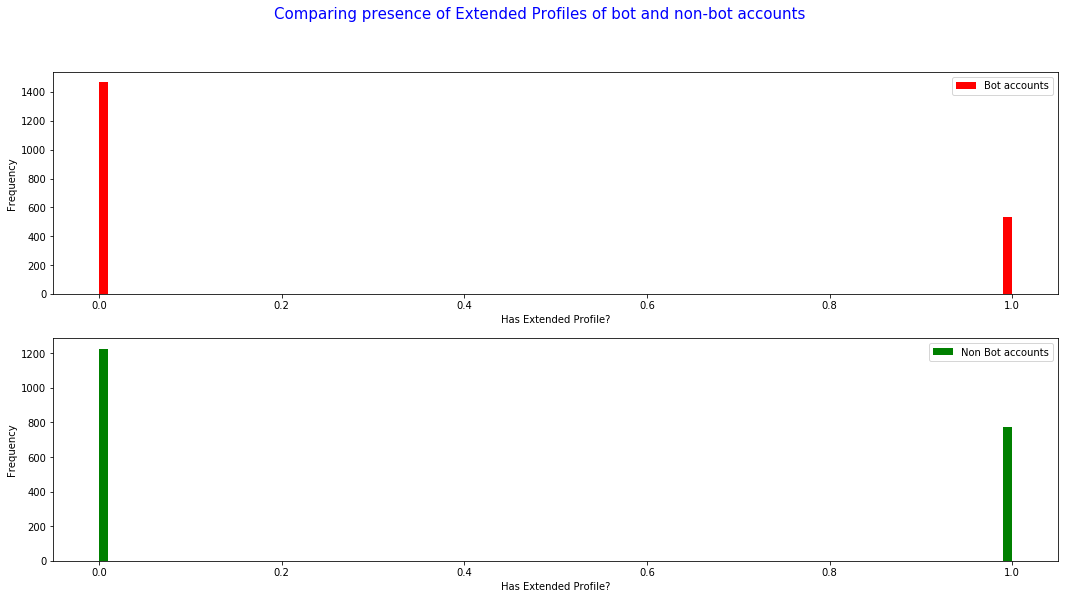

In [19]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing presence of Extended Profiles of bot and non-bot accounts", fontsize=15, color="b")
ax[0].hist(bot_accountDF.has_extended_profile, bins=100, color="r", label="Bot accounts")
ax[0].set_xlabel("Has Extended Profile?")
ax[0].set_ylabel("Frequency")

ax[1].hist(nonbot_accountDF.has_extended_profile, bins=100, color='g', label="Non Bot accounts")
ax[1].set_xlabel("Has Extended Profile?")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

### Default Image:

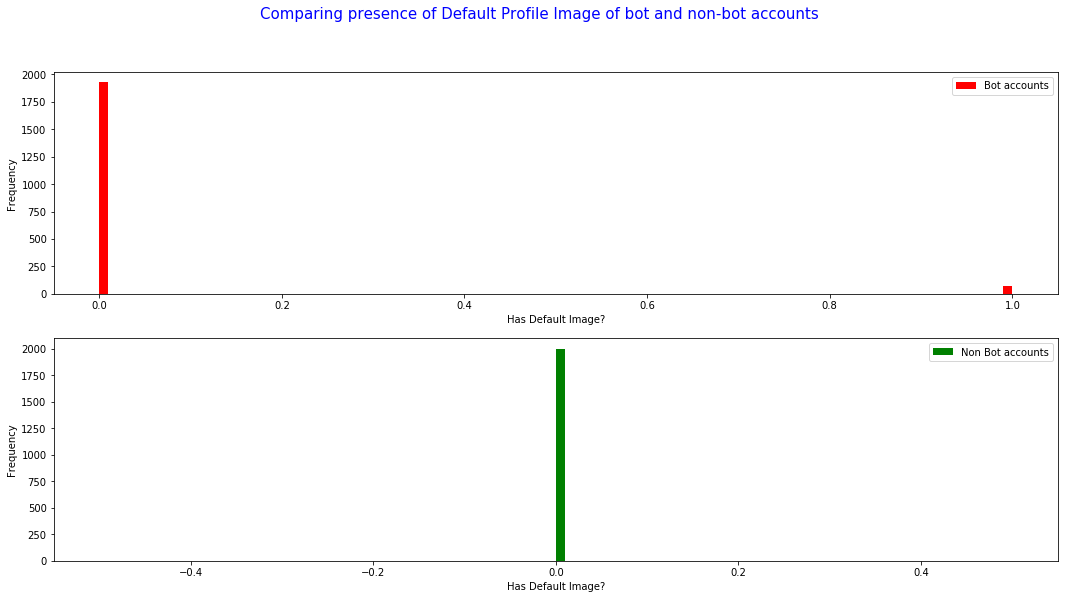

In [20]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing presence of Default Profile Image of bot and non-bot accounts", fontsize=15, color="b")
ax[0].hist(bot_accountDF.default_profile_image, bins=100, color="r", label="Bot accounts")
ax[0].set_xlabel("Has Default Image?")
ax[0].set_ylabel("Frequency")

ax[1].hist(nonbot_accountDF.default_profile_image, bins=100, color='g', label="Non Bot accounts")
ax[1].set_xlabel("Has Default Image?")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

### Default Profile:


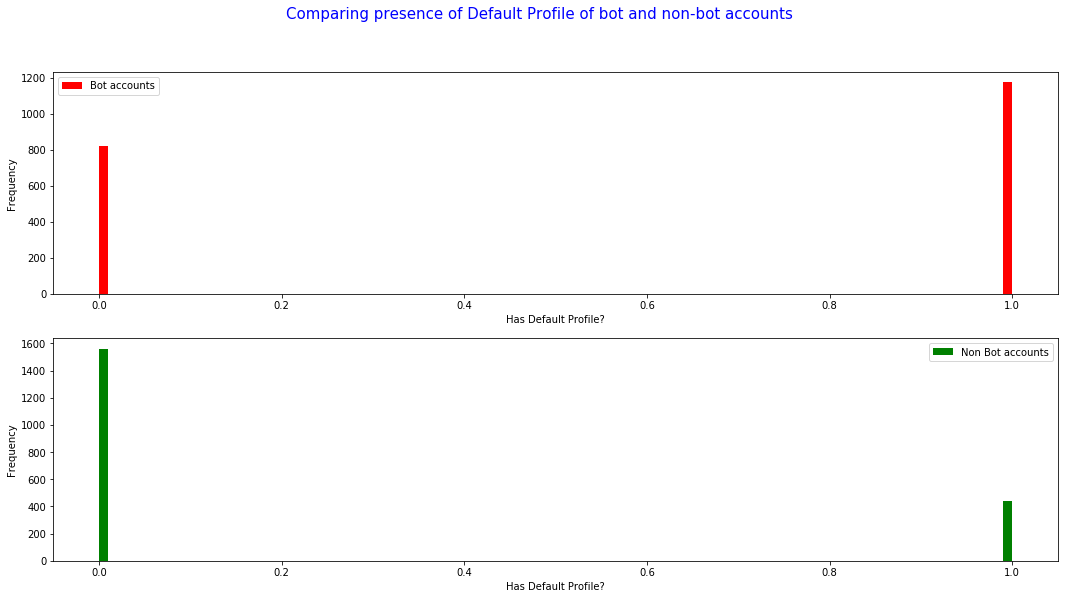

In [21]:
fig, ax = plt.subplots(2,1, figsize=(18,9))
fig.suptitle("Comparing presence of Default Profile of bot and non-bot accounts", fontsize=15, color="b")
ax[0].hist(bot_accountDF.default_profile, bins=100, color="r", label="Bot accounts")
ax[0].set_xlabel("Has Default Profile?")
ax[0].set_ylabel("Frequency")

ax[1].hist(nonbot_accountDF.default_profile, bins=100, color='g', label="Non Bot accounts")
ax[1].set_xlabel("Has Default Profile?")
ax[1].set_ylabel("Frequency")

ax[0].legend()
ax[1].legend()

** Let's plot the whole scatter matrix and see if there is any direct relation ship that we can identify and based on that we can do further analysis ** 

<h3> Plotting the Scatter matrix for Bot Accounts </h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123f570b8>,
      dtype=object)

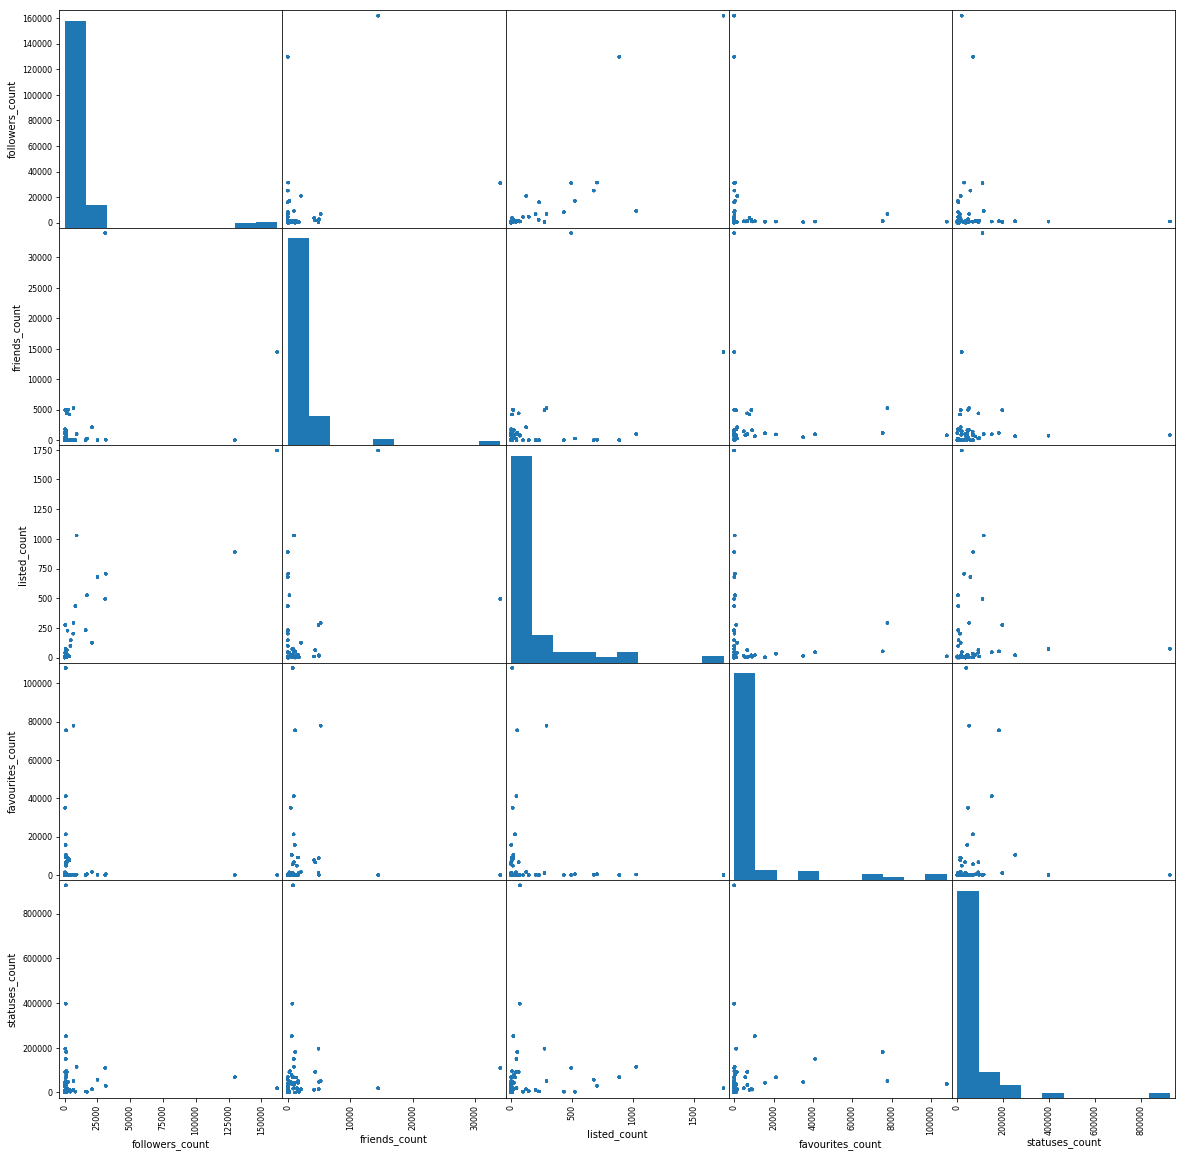

In [22]:
scatter_matrix(bot_accountDF[["followers_count", "friends_count", "listed_count", "favourites_count","statuses_count"]], figsize=(20,20))

<h3> Plotting the Scatter matrix for Non Bot Accounts </h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124db04a8>,
      dtype=object)

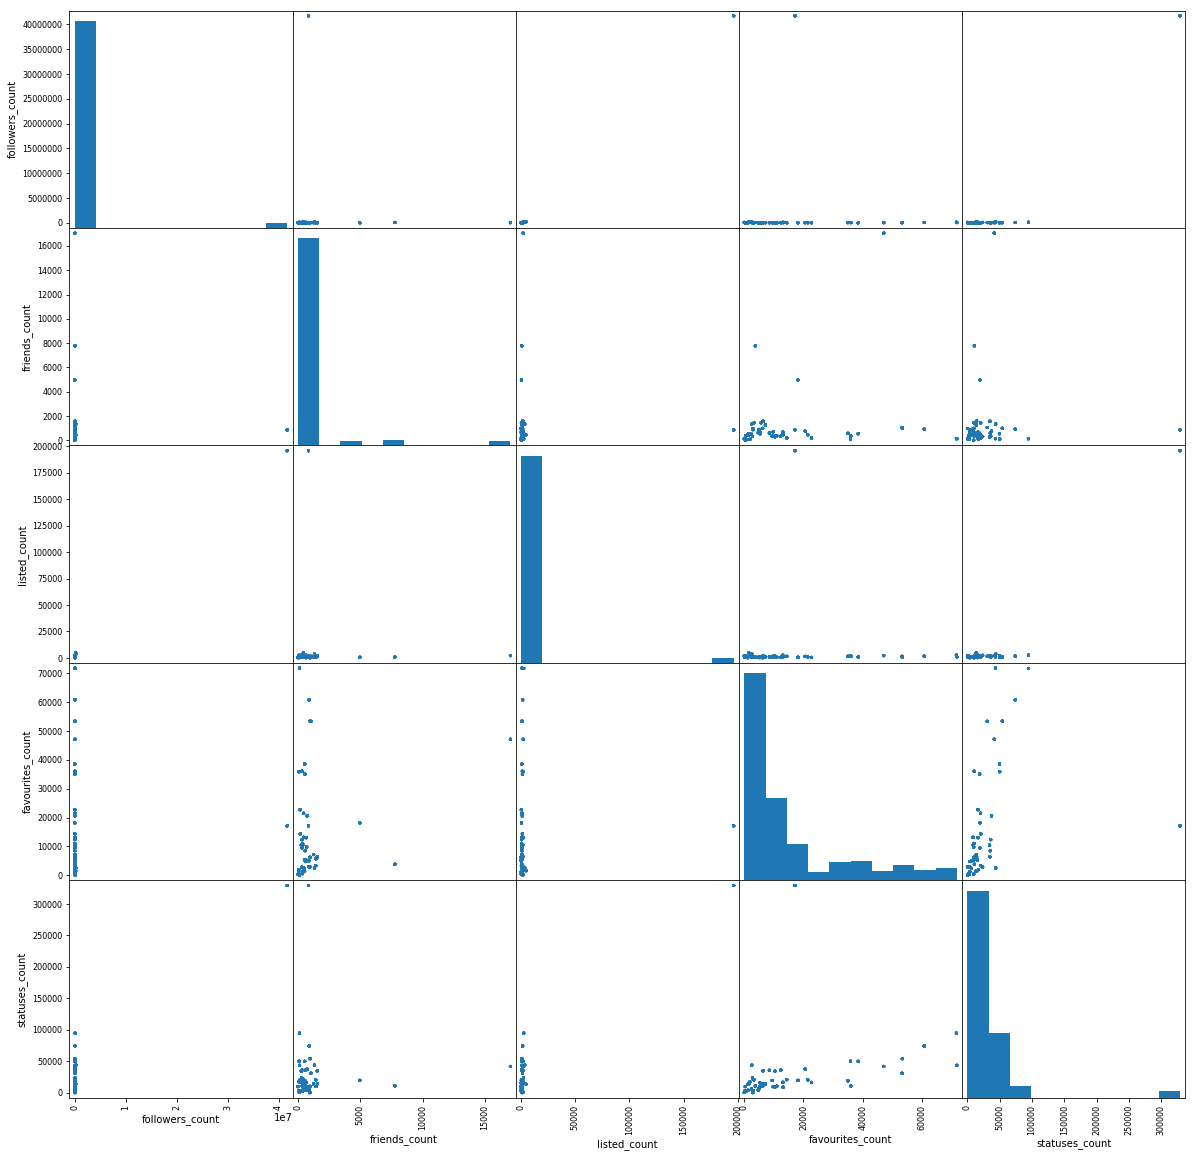

In [23]:
scatter_matrix(nonbot_accountDF[["followers_count", "friends_count", "listed_count", "favourites_count","statuses_count"]], figsize=(20,20))

** There seems to be some positive correlation between favorites count and the status_counts **

<h2> Let's look at the actual tweets from these accounts, we are going to show a <i>WordCloud</i> from both Bot accounts and Non bot accounts </h2>

In [24]:
bot_tweets = tweetsDF[tweetsDF.isBot==1]
nonbot_tweets = tweetsDF[tweetsDF.isBot==0]
print("Number of tweets by Bots are {} and number of tweets by non bot accounts are {}".format(len(bot_tweets), len(nonbot_tweets)))

Number of tweets by Bots are 6030 and number of tweets by non bot accounts are 4507


In [25]:
bot_tweets_str = ""
for tweet in bot_tweets.full_text:
    bot_tweets_str += ''.join([i if ord(i) < 128 else ' ' for i in tweet])

    
nonbot_tweets_str = ""
for tweet in nonbot_tweets.full_text:
    nonbot_tweets_str += ''.join([i if ord(i) < 128 else ' ' for i in tweet])


In [26]:
def clean_str(string):
    
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"|", "", string)
    string = re.sub(r"u\s", "", string)
    string = re.sub(r'[^\x00-\x7F]+',' ', string)
    return string.strip().lower()

def validate_json(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub("\'s", "\"s", string)
    string = re.sub("\'{\r", "\"", string)
    string = re.sub(r"False", " false", string)
    string = re.sub(r"None", "", string)
    
    return string.strip()


# Defining the wordCloud method.
def generate_wordCloud(text, title):
    text = clean_str(text) ## clear the string
    stopwords = set(STOPWORDS)
    extra_stopwords = {'one', 'al','et', 'br', 'Po', 'th', 'sayi', 'fr','wi', 'Unknown','co',
                       'https', 'u\'rt', 'nhttp','text', 'rt', "amp", "nhttps",'u','n\'t'}
    stopwords = stopwords.union(extra_stopwords)
    wc = WordCloud(stopwords=stopwords,
                  max_font_size=100,
                  max_words=100,
                  random_state=30,
                  background_color='white',mask=None).generate(str(text))

    plt.figure(figsize=(15,20))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off') # dont show the axes
    plt.title(title, fontdict={'size': 35,'color':"red" ,
                                  'verticalalignment': 'bottom'})
    plt.show()

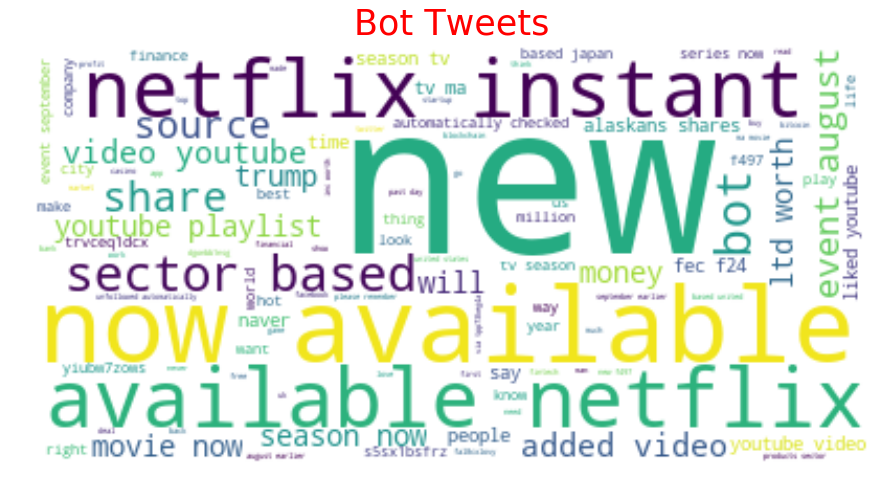

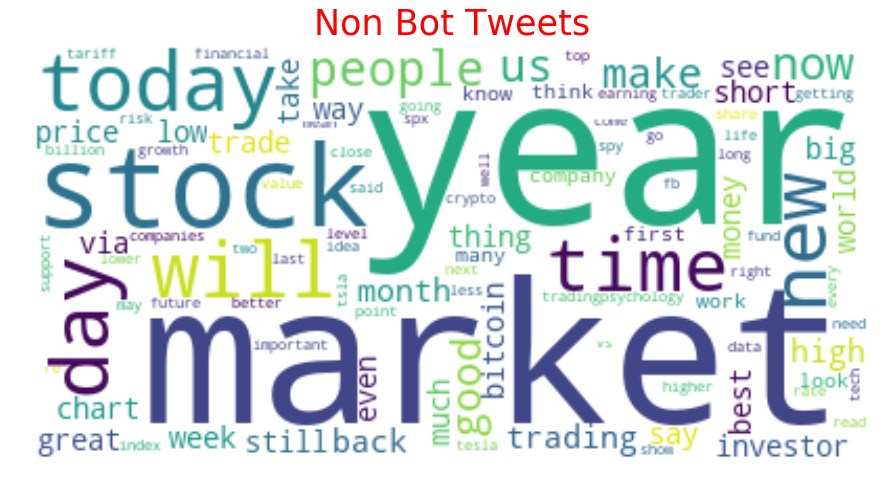

In [27]:
generate_wordCloud(bot_tweets_str, "Bot Tweets")
generate_wordCloud(nonbot_tweets_str, "Non Bot Tweets")

** We can see that the non bots accounts have more meaning full text vs bot accounts are verbiage in some kind which is kind of what you would expect since most bot tweets are very short scripted with a youtube url ta or some link ** 

## Feature Engineering
### We will take the features discussed above and create a new dataset 

In [28]:
def transform_dataframe(accountDF):
    refinedDF = pd.DataFrame(data=accountDF['screen_name'], columns=['screen_name'])
    refinedDF['popularity_ratio'] = accountDF['friends_count'] / accountDF['followers_count']
    refinedDF['listed_count'] = accountDF['listed_count']
    refinedDF['verified'] = accountDF['verified']
    refinedDF['tweets_per_day'] = accountDF['statuses_count']/ (datetime.now() - accountDF.created_at).astype('timedelta64[D]')
    refinedDF['default_profile'] = accountDF['default_profile']
    return refinedDF
    
accountDF_refined = transform_dataframe(accountDF)

In [29]:
accountDF_refined.shape

(3960, 6)

### We will now merge the tweets to this dataset and create our final data

In [30]:
tweetsDF_refined = pd.concat([tweetsDF[['name', 'full_text', 'lang', 'isBot']]], axis=1)

tweetsDF_refined.count()

name         10537
full_text    10537
lang         10537
isBot        10537
dtype: int64

In [31]:
tweets_with_accounts = pd.merge(accountDF_refined, tweetsDF_refined, left_on="screen_name", right_on="name", how="left")

In [32]:
tweets_with_accounts.count()

screen_name         418187
popularity_ratio    418187
listed_count        418187
verified            418187
tweets_per_day      418187
default_profile     418187
name                418116
full_text           418116
lang                418116
isBot               418116
dtype: int64

In [33]:
tweets_with_accounts.dtypes

screen_name          object
popularity_ratio    float64
listed_count          int64
verified               bool
tweets_per_day      float64
default_profile        bool
name                 object
full_text            object
lang                 object
isBot               float64
dtype: object

### Translating boolean features to binary

In [34]:

tweets_with_accounts["verified"] = (tweets_with_accounts["verified"] == True).astype(int)
tweets_with_accounts["default_profile"] = (tweets_with_accounts["default_profile"] == True).astype(int)

In [35]:
tweets_with_accounts.head()

,screen_name,popularity_ratio,listed_count,verified,tweets_per_day,default_profile,name,full_text,lang,isBot
0,DearAssistant,0.000213,146,0,2.682644,0,DearAssistant,2159.3 miles RT @Hi_5040 whats the lenght of t...,en,1.0
1,SanJacintoClan,1.988737,19,0,14.762141,0,SanJacintoClan,Sean Rima: The Rape of The Alamo. https://t.co...,en,1.0
2,SanJacintoClan,1.988737,19,0,14.762141,0,SanJacintoClan,https://t.co/P28ddc7a4C,und,1.0
3,SanJacintoClan,1.988737,19,0,14.762141,0,SanJacintoClan,Martinez is the cousin to the wife of the gove...,en,1.0
4,SanJacintoClan,1.988737,19,0,14.762141,0,SanJacintoClan,"Charlotte Rae, 'The Facts of Life' and 'Diff'r...",en,1.0


### Save the dataset in a file for modelling

In [37]:
tweets_with_accounts.to_csv("data/tweets_with_accounts.csv")